# Pandas Series

O objeto Series do módulo Pandas pode ser visto como um vetor ou matriz rotulada de 1 dimensão.

Para mais informações sobre **Series** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

O código fonte do objeto Series está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/series.py).

In [1]:
import pandas as pd
import numpy as np

### Criando Series a partir de listas

In [2]:
idades = [68, 23, 17, 39, 25, 58]
idades

[68, 23, 17, 39, 25, 58]

In [3]:
s = pd.Series(idades)
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [4]:
# Como retornar a idade 39?
s[3]

39

In [5]:
s = pd.Series([68, 23, 17, 39, 25, 58])
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [6]:
pessoas = ['Eni', 'Bia', 'Flávio', 'Carlos', 'Dedé', 'Abigail']

In [7]:
s1 = pd.Series(idades, pessoas)
s1

Eni        68
Bia        23
Flávio     17
Carlos     39
Dedé       25
Abigail    58
dtype: int64

In [8]:
# Como retornar a idade 39, agora que a série está rotulada?
s1['Carlos']

39

In [9]:
s2 = pd.Series(index = pessoas, data = idades)
s2

Eni        68
Bia        23
Flávio     17
Carlos     39
Dedé       25
Abigail    58
dtype: int64

### Criando Series a partir de tuplas

In [10]:
# Minas Gerais teve seu nome digitado errado de forma intencional
nomes = ("Mnas Gerais", "Amazonas", "Maranhão", "Goiás", "Santa Catarina")
nomes

('Mnas Gerais', 'Amazonas', 'Maranhão', 'Goiás', 'Santa Catarina')

In [11]:
siglas = ("MG", "AM", "MA", "GO", "SC")
siglas

('MG', 'AM', 'MA', 'GO', 'SC')

In [12]:
estados = pd.Series(nomes, siglas)
estados

MG       Mnas Gerais
AM          Amazonas
MA          Maranhão
GO             Goiás
SC    Santa Catarina
dtype: object

In [13]:
estados["MG"] = "Minas Gerais"
estados

MG      Minas Gerais
AM          Amazonas
MA          Maranhão
GO             Goiás
SC    Santa Catarina
dtype: object

### Criando Series a partir de arrays NumPy

In [14]:
precos = np.array([25, 22, 18.5, 4.75, 3, 4.5, 2.3])
precos

array([25.  , 22.  , 18.5 ,  4.75,  3.  ,  4.5 ,  2.3 ])

In [15]:
type(precos)

numpy.ndarray

In [16]:
lanches = np.array(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo', 'Coxinha', 'Pastel'])
lanches

array(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'], dtype='<U13')

In [17]:
s3 = pd.Series(precos)
s3

0    25.00
1    22.00
2    18.50
3     4.75
4     3.00
5     4.50
6     2.30
dtype: float64

In [18]:
cardapio = pd.Series(precos, lanches)
cardapio

X-tudo           25.00
X-Bacon          22.00
Bauru            18.50
Misto-quente      4.75
Pão-de-queijo     3.00
Coxinha           4.50
Pastel            2.30
dtype: float64

### Criando Series a partir de dicionários

In [19]:
dic_estados = {"MG": "Minas Gerais", "CE": "Ceará", "MT": "Mato Grosso", "RR": "Roraima"}
serie_estados = pd.Series(dic_estados)
serie_estados

MG    Minas Gerais
CE           Ceará
MT     Mato Grosso
RR         Roraima
dtype: object

In [20]:
dic_estados2 = {"MG": {"Estado":"Minas Gerais", "Capital":"Belo Horizonte", "População (2014)":20777672}, 
               "CE": {"Estado":"Ceará", "Capital":"Fortaleza", "População (2014)":8867448},
               "MT": {"Estado":"Mato Grosso", "Capital":"Cuiabá", "População (2014)":3236578},
               "RR": {"Estado":"Roraima", "Capital":"Boa Vista", "População (2014)":500826},}
serie_estados2 = pd.Series(dic_estados2)
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [21]:
serie_estados2["MT"]

{'Estado': 'Mato Grosso', 'Capital': 'Cuiabá', 'População (2014)': 3236578}

In [22]:
serie_estados2["RR"]["Capital"]

'Boa Vista'

### Criando Series a partir de arquivos .csv

In [23]:
# O arquivo idades.csv contém as idades de 100 pessoas (apenas 1 coluna)
idadescsv = pd.read_csv("idades.csv")
idadescsv.head() # mostra as primeiras linhas de uma Series ou DataFrame

,Idades
0,55
1,45
2,74
3,18
4,21


In [24]:
# É possível acessar o índice 3?
idadescsv[3]

KeyError: 3

In [25]:
type(idadescsv)

pandas.core.frame.DataFrame

In [26]:
# Forma correta de acessar, mas vamos estudar o objeto DataFrame em outra aula
idadescsv['Idades'][3]

18

In [27]:
# Passando o argumento squeeze = True (por default squeeze = False)
# Quando squeeze = True, se os dados estiverem em apenas 1 dimensão, é então retornado uma Series
idadescsv = pd.read_csv("idades.csv", squeeze=True)
idadescsv.head()

0    55
1    45
2    74
3    18
4    21
Name: Idades, dtype: int64

In [28]:
idadescsv[3]

18

In [29]:
type(idadescsv)

pandas.core.series.Series

In [30]:
# O arquivo idades2.csv contém o nomes e idade de 100 pessoas. A coluna nome será usada como índice.
idadescsv2 = pd.read_csv("idades2.csv", squeeze=True)
idadescsv2.head()

,Nome,Idade
0,Agatha,24
1,Alice,27
2,Alícia,18
3,Amanda,18
4,Ana Beatriz,44


In [31]:
type(idadescsv2)

pandas.core.frame.DataFrame

In [32]:
idadescsv3 = pd.read_csv("idades2.csv", index_col = 0, squeeze=True)
idadescsv3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [33]:
idadescsv4 = pd.read_csv("idades2.csv", index_col = 1, squeeze=True)
idadescsv4.head()

Idade
24         Agatha
27          Alice
18         Alícia
18         Amanda
44    Ana Beatriz
Name: Nome, dtype: object

### Criando Series a partir de planilhas do Excel

In [34]:
idadesxls = pd.read_excel("idades2.xlsx", squeeze=True)
idadesxls.head()
# Abre a primeira planilha

0    55
1    45
2    74
3    18
4    21
Name: Idades, dtype: int64

In [35]:
idadesxls2 = pd.read_excel("idades2.xlsx", sheet_name="Planilha2")
idadesxls2.head()

,Nome,Idade
0,Agatha,24
1,Alice,27
2,Alícia,18
3,Amanda,18
4,Ana Beatriz,44


In [36]:
type(idadesxls2)

pandas.core.frame.DataFrame

In [37]:
idadesxls3 = pd.read_excel("idades2.xlsx", sheet_name="Planilha2", index_col = 0, squeeze=True)
idadesxls3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [38]:
type(idadesxls3)

pandas.core.series.Series

### Atributos do objeto Series

| Atributo | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[dtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dtype.html) | Retorna o tipo dos dados armazenados em um objeto Series | `s.dtype`|
|[index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) | Retorna o índice (rótulos) de um objeto Series | `s.index`|
|[name](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html) | Retorna o nome | `s.name`|
|[nbytes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nbytes.html) | Retorna o tamanho em bytes de um objeto Series | `s.nbytes`|
|[ndim](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ndim.html) | Retorna o número de dimensões de um objeto Series | `s.ndim`|
|[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shape.html) | Retorna uma tupla com o formato de um objeto Series | `s.shape`|
|[size](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.size.html) | Retorna a quantidade de elementos de um objeto Series | `s.size`|
|[values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html) | Retorna os elementos de um objeto Series como um *ndarray*| `s.values`|

In [39]:
cardapio.dtype

dtype('float64')

In [40]:
cardapio.index

Index(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'],
      dtype='object')

In [41]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [42]:
cardapio.name = "Cardápio"

In [43]:
cardapio.name

'Cardápio'

In [44]:
cardapio.nbytes

56

In [45]:
cardapio.ndim

1

In [46]:
cardapio.shape

(7,)

In [47]:
cardapio.size

7

In [48]:
cardapio.values

array([25.  , 22.  , 18.5 ,  4.75,  3.  ,  4.5 ,  2.3 ])

### Métodos do objeto Series: indexação e iteração

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[at()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.at.html) | Acessa o elemento da chave passada por parâmetro | `s.iat["chave"]`|
|[iat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iat.html) | Acessa o elemento no índice passado por parâmetro | `s.iat(0)`|
|[get()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html#pandas.Series.get) | Retorna um valor para a chave passada por parâmetro | `s.get(2)`|
|[loc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html) | Acessa os elementos para as chaves passadas por parâmetro | `s.loc["chave1", "chave2"]`|
|[iloc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iloc.html) | Acesso via índice | `s.iloc[0] ou s.iloc[[1,3]]`|
|[keys()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.keys.html) | Retorna o índice (rótulos) de um objeto Series | `s.keys()`|

In [49]:
cardapio

X-tudo           25.00
X-Bacon          22.00
Bauru            18.50
Misto-quente      4.75
Pão-de-queijo     3.00
Coxinha           4.50
Pastel            2.30
Name: Cardápio, dtype: float64

In [50]:
cardapio.at["X-tudo"]

25.0

In [51]:
cardapio.iat[0]

25.0

In [52]:
cardapio.iat[0] = 25.5

In [53]:
cardapio.get(0)

25.5

In [54]:
cardapio.loc[["Bauru", "Pastel"]]

Bauru     18.5
Pastel     2.3
Name: Cardápio, dtype: float64

In [55]:
cardapio.iloc[[0,2,3]]

X-tudo          25.50
Bauru           18.50
Misto-quente     4.75
Name: Cardápio, dtype: float64

In [56]:
cardapio.keys()

Index(['X-tudo', 'X-Bacon', 'Bauru', 'Misto-quente', 'Pão-de-queijo',
       'Coxinha', 'Pastel'],
      dtype='object')

### Métodos do objetos Series: operações matemáticas e estatísticas

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[add()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html) | Retorna a soma com outra Series ou escalar, elemento por elemento | `c = a.add(b, fill_value=0)`|
|[sub()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html) | Retorna a subtração com outra Series ou escalar, elemento por elemento | `c = a.sub(b, fill_value=3)`|
|[mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html) | Retorna a multiplicação com outra Series ou escalar, elemento por elemento | `c = a.mul(b, fill_value=1)`|
|[div()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.div.html) | Retorna a divisão com outra Series ou escalar, elemento por elemento | `c = a.div(b, fill_value=1)`|
|[floordiv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.floordiv.html) | Retorna a divisão inteira com outra Series ou escalar, elemento por elemento | `c = a.floordiv(b, fill_value=1)`|
|[mod()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mod.html) | Retorna o resto da divisão com outra Series ou escalar, elemento por elemento | `c = a.mod(b, fill_value=1)`|
|[pow()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pow.html) | Retorna a potenciação com outra Series ou escalar, elemento por elemento | `c = a.pow(b, fill_value=1)`|
|[round()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html) | Arredonda os valores de uma Series para uma quantidade determinada de casas decimais | `s = a.round(2)`|
|[lt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.lt.html) | Retorna o resultado da comparação *menor que*, aplicada elemento por elemento, entre duas Series | `c = a.lt(b, fill_value=0)`|
|[gt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.gt.html) | Retorna o resultado da comparação *maior que*, aplicada elemento por elemento, entre duas Series | `c = a.gt(b, fill_value=0)`|
|[le()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.le.html) | Retorna o resultado da comparação *menor ou igual*, aplicada elemento por elemento, entre duas Series | `c = a.le(b, fill_value=0)`|
|[ge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ge.html) | Retorna o resultado da comparação *maior ou igual*, aplicada elemento por elemento, entre duas Series | `c = a.ge(b, fill_value=0)`|
|[ne()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ne.html) | Retorna o resultado da comparação *não igual a*, aplicada elemento por elemento, entre duas Series | `c = a.ne(b, fill_value=0)`|
|[eq()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.eq.html) | Retorna o resultado da comparação *igual a*, aplicada elemento por elemento, entre duas Series | `c = a.eq(b, fill_value=0)`|
|[product()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.product.html) | Retorna o produto entre todos os elementos de um objeto Series | `s.product()`|
|[sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html) | Retorna a soma entre todos os elementos de um objeto Series | `s.sum()`|
|[abs()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.abs.html) | Retorna valor absoluto de todos os elementos de um objeto Series | `s.abs()`|
|[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html) | Retorna a média aritmética entre todos os elementos de um objeto Series | `s.mean()`|
|[count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.count.html) | Retorna a quantidade de elementos não nulos | `s.count()`|
|[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html) | Gera um relatório com diversas medidas estatísticas como média, percentis, etc...  | `s.describe()`|
|[max()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html) | Retorna o maior valor | `s.max()`|
|[min()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html) | Retorna o menor valor | `s.min()`|
|[median()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html) | Retorna a mediana entre todos os elementos | `s.median()`|
|[nlargest()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html) | Retorna os *n* maiores elementos | `s.nlargest(3)`|
|[nsmallest()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nsmallest.html) | Retorna os *n* menores elementos | `s.nsmallest(5)`|
|[quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html) | Retorna o valor de determinado quantil passado por parâmetro | `s.quantile(0.25)`|
|[std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html) | Retorna o desvio padrão | `s.std()`|
|[unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) | Retorna  valores únicos | `s.unique()`|
|[nunique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) | Retorna a quantidade de elementos únicos | `s.nunique()`|

### add(), sub(), mul(), div(), floordiv(), mod() e pow()

In [57]:
a = pd.Series([4, 8, 2, 5, 7])
b = pd.Series([1, 2, 3, 4, 5])
c = a.add(b)
print(" ",a.values)
print("+",b.values)
print("="*16)
print(c.values)

  [4 8 2 5 7]
+ [1 2 3 4 5]
[ 5 10  5  9 12]


In [58]:
a2 = a.add(3)
print(" ",a.values)
print("+",3)
print("="*16)
print(a2.values)

  [4 8 2 5 7]
+ 3
[ 7 11  5  8 10]


In [59]:
d = a.sub(b)
print(" ",a.values)
print("-",b.values)
print("="*16)
print(d.values)

  [4 8 2 5 7]
- [1 2 3 4 5]
[ 3  6 -1  1  2]


In [60]:
e = a.mul(b)
print(" ",a.values)
print("*",b.values)
print("="*16)
print(e.values)

  [4 8 2 5 7]
* [1 2 3 4 5]
[ 4 16  6 20 35]


In [61]:
f = a.div(b)
print(" ",a.values)
print("/",b.values)
print("="*16)
print(d.values)

  [4 8 2 5 7]
/ [1 2 3 4 5]
[ 3  6 -1  1  2]


In [62]:
g = a.floordiv(b)
print("  ",a.values)
print("//",b.values)
print("="*16)
print("  ",g.values)

   [4 8 2 5 7]
// [1 2 3 4 5]
   [4 4 0 1 1]


In [63]:
h = a.mod(b)
print(" ",a.values)
print("%",b.values)
print("="*16)
print(" ",h.values)

  [4 8 2 5 7]
% [1 2 3 4 5]
  [0 0 2 1 2]


In [64]:
i = a.pow(b)
print("  ",a.values)
print("**",b.values)
print("="*16)
print(" ",i.values)

   [4 8 2 5 7]
** [1 2 3 4 5]
  [    4    64     8   625 16807]


In [65]:
j = a.pow(2)
print("  ",a.values)
print("**",2)
print("="*16)
print(" ",j.values)

   [4 8 2 5 7]
** 2
  [16 64  4 25 49]


In [66]:
# usando o parâmetro fill_value
a = pd.Series([4, 3, 5, np.nan, None, 7], index=['a', 'b', 'c', 'd', 'e', 'f'])
a

a    4.0
b    3.0
c    5.0
d    NaN
e    NaN
f    7.0
dtype: float64

In [67]:
b = pd.Series([2, 5, np.nan, np.nan, 3, 6], index=['a', 'b', 'c', 'd', 'e', 'g'])
b

a    2.0
b    5.0
c    NaN
d    NaN
e    3.0
g    6.0
dtype: float64

In [68]:
k = a.div(b, fill_value = 1)
print(" ",a.values)
print("/",b.values)
print("="*16)
print(k.values)

  [ 4.  3.  5. nan nan  7.]
/ [ 2.  5. nan nan  3.  6.]
[2.         0.6        5.                nan 0.33333333 7.
 0.16666667]


### round()

In [69]:
a = pd.Series(np.random.randint(0, 100, 10)).pow(1/2)
a

0    9.055385
1    8.000000
2    7.937254
3    5.916080
4    9.110434
5    4.690416
6    4.582576
7    7.071068
8    9.219544
9    7.348469
dtype: float64

In [70]:
a = a.round(2)
a

0    9.06
1    8.00
2    7.94
3    5.92
4    9.11
5    4.69
6    4.58
7    7.07
8    9.22
9    7.35
dtype: float64

In [71]:
a = a.round(0)
a

0    9.0
1    8.0
2    8.0
3    6.0
4    9.0
5    5.0
6    5.0
7    7.0
8    9.0
9    7.0
dtype: float64

### lt(), gt(), le(), ge(), ne() e eq()

In [72]:
np.random.seed(51)
a = pd.Series(np.random.randint(0, 10, 5))
a

0    9
1    5
2    0
3    9
4    5
dtype: int64

In [73]:
b = pd.Series(np.random.randint(0, 10, 5))
b

0    0
1    5
2    4
3    9
4    5
dtype: int64

In [74]:
a.lt(b)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [75]:
print(" ",a.values)
print("<",b.values)
print("="*32)
print(a.lt(b).values)

  [9 5 0 9 5]
< [0 5 4 9 5]
[False False  True False False]


In [76]:
print(" ",a.values)
print(">",b.values)
print("="*32)
print(a.gt(b).values)

  [9 5 0 9 5]
> [0 5 4 9 5]
[ True False False False False]


In [77]:
print("  ",a.values)
print("<=",b.values)
print("="*32)
print(a.le(b).values)

   [9 5 0 9 5]
<= [0 5 4 9 5]
[False  True  True  True  True]


In [78]:
print("  ",a.values)
print(">=",b.values)
print("="*32)
print(a.ge(b).values)

   [9 5 0 9 5]
>= [0 5 4 9 5]
[ True  True False  True  True]


In [79]:
print("  ",a.values)
print("!=",b.values)
print("="*32)
print(a.ne(b).values)

   [9 5 0 9 5]
!= [0 5 4 9 5]
[ True False  True False False]


In [80]:
print("  ",a.values)
print("==",b.values)
print("="*32)
print(a.eq(b).values)

   [9 5 0 9 5]
== [0 5 4 9 5]
[False  True False  True  True]


### sum(), product(), abs()

In [81]:
s

0    68
1    23
2    17
3    39
4    25
5    58
dtype: int64

In [82]:
s.sum()

230

In [83]:
s.product()

1503551400

In [84]:
posneg = pd.Series(np.arange(-6,6,2))
posneg

0   -6
1   -4
2   -2
3    0
4    2
5    4
dtype: int64

In [85]:
posneg.abs()

0    6
1    4
2    2
3    0
4    2
5    4
dtype: int64

### Métodos estatísticos

In [86]:
idadescsv3.describe()

count    100.000000
mean      35.570000
std       10.766817
min       18.000000
25%       26.750000
50%       34.000000
75%       45.250000
max       55.000000
Name: Idade, dtype: float64

In [87]:
idadescsv3.mean()

35.57

In [88]:
idadescsv3.std()

10.766816773510332

In [89]:
idadescsv3.median()

34.0

In [90]:
idadescsv3.min()

18

In [91]:
idadescsv3.max()

55

In [92]:
idadescsv3.quantile(0.25)

26.75

In [93]:
idadescsv3.quantile(.5)

34.0

In [94]:
idadescsv3.quantile(.75)

45.25

In [95]:
idadescsv3.nlargest(3)

Nome
Lucas        55
Valentina    54
Lucca        53
Name: Idade, dtype: int64

In [96]:
idadescsv3.nsmallest(3)

Nome
Alícia      18
Amanda      18
Bernardo    18
Name: Idade, dtype: int64

In [97]:
idadescsv3.unique()

array([24, 27, 18, 44, 46, 49, 47, 41, 19, 25, 31, 42, 23, 39, 21, 33, 45,
       34, 43, 29, 36, 40, 32, 22, 48, 52, 51, 55, 53, 26, 54])

In [98]:
# Usando np.sort para ordenar o array de elementos únicos
np.sort(idadescsv3.unique())

array([18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 36, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55])

In [99]:
idadescsv3.nunique()

31

In [100]:
idadescsv3.count()

100

In [101]:
b = pd.Series([2, 5, np.nan, 0, 3, None, 6])
b.values

array([ 2.,  5., nan,  0.,  3., nan,  6.])

In [102]:
b.count()

5

### Métodos do objetos Series: manipulação e seleção

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.copy.html#pandas.Series.copy) | Retorna uma cópia de um objetos Series | `s.copy()`|
|[append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html) | Concatena duas ou mais Series | `s = a.append(b)`|
|[replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) | Substitui valor da Series por outro passado por parâmetro | `s = a.replace(-1, 0)`|
|[update()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.update.html) | Modifica uma série por valores de outra série passada por parâmetro | `a.update(b)`|
|[head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.head.html) | Retorna as *n* primeiras linhas | `s.head(3)`|
|[tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tail.html) | Retorna as *n* últimas linhas | `s.tail(4)`|
|[sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) | Retorna uma amostra | `s.sample()`|
|[where()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html) | Retorna uma Series onde valores para os quais a condição é **False** são substituídos por outro passado por parâmetro | `s.where(s <= 0, 5)`|
|[mask()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html) | Retorna uma Series onde valores para os quais a condição é **True** são substituídos por outro passado por parâmetro | `s.mask(s > 0, 5)`|

#### copy()

In [103]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [104]:
# Shallow copy
copia = serie_estados2.copy()
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [105]:
copia["MT"]["Capital"] = "CGB"
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [106]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [107]:
# Retornando ao valor original
serie_estados2["MT"]["Capital"] = "Cuiabá"
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [108]:
# Deep copy
import pickle
copia = pickle.loads(pickle.dumps(serie_estados2))

In [109]:
copia["MT"]["Capital"] = "CGB"
copia

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'CGB', 'P...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

In [110]:
serie_estados2

MG    {'Estado': 'Minas Gerais', 'Capital': 'Belo Ho...
CE    {'Estado': 'Ceará', 'Capital': 'Fortaleza', 'P...
MT    {'Estado': 'Mato Grosso', 'Capital': 'Cuiabá',...
RR    {'Estado': 'Roraima', 'Capital': 'Boa Vista', ...
dtype: object

#### append()

In [111]:
a

0    9
1    5
2    0
3    9
4    5
dtype: int64

In [112]:
b

0    2.0
1    5.0
2    NaN
3    0.0
4    3.0
5    NaN
6    6.0
dtype: float64

In [113]:
ab = a.append(b)
ab

0    9.0
1    5.0
2    0.0
3    9.0
4    5.0
0    2.0
1    5.0
2    NaN
3    0.0
4    3.0
5    NaN
6    6.0
dtype: float64

In [114]:
ab = a.append(b, ignore_index=True)
ab

0     9.0
1     5.0
2     0.0
3     9.0
4     5.0
5     2.0
6     5.0
7     NaN
8     0.0
9     3.0
10    NaN
11    6.0
dtype: float64

#### replace()

In [115]:
c = ab.replace(0, 1)
c

0     9.0
1     5.0
2     1.0
3     9.0
4     5.0
5     2.0
6     5.0
7     NaN
8     1.0
9     3.0
10    NaN
11    6.0
dtype: float64


#### update()

In [116]:
d = pd.Series([4, 10, 11, 12], index=[9, 7, 10, 4])
d

9      4
7     10
10    11
4     12
dtype: int64

In [117]:
c.update(d)
c

0      9.0
1      5.0
2      1.0
3      9.0
4     12.0
5      2.0
6      5.0
7     10.0
8      1.0
9      4.0
10    11.0
11     6.0
dtype: float64

#### head()

In [118]:
idadescsv3.head() # Por default retornar as 5 primeiras linhas

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [119]:
idadescsv3.head(8)

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Ana Clara      46
Ana Julia      49
Ana Luiza      47
Name: Idade, dtype: int64

#### tail()

In [120]:
idadescsv3.tail() # Por default retornar as 5 últimas linhas

Nome
Valentina    54
Vinicius     32
Vitor        41
Vitória      49
Yasmin       52
Name: Idade, dtype: int64

In [121]:
idadescsv3.tail(3)

Nome
Vitor      41
Vitória    49
Yasmin     52
Name: Idade, dtype: int64

#### sample()

In [122]:
idadescsv3.sample() # Por default retorna 1 linha de amostra

Nome
Clara    25
Name: Idade, dtype: int64

In [123]:
idadescsv3.sample(5)

Nome
Maria Fernanda    18
Ian               48
Thiago            47
Ana Luiza         47
Agatha            24
Name: Idade, dtype: int64

#### where()

In [124]:
c = a.append(b,ignore_index=True)
c

0     9.0
1     5.0
2     0.0
3     9.0
4     5.0
5     2.0
6     5.0
7     NaN
8     0.0
9     3.0
10    NaN
11    6.0
dtype: float64

In [125]:
d = c.where(c > 3, 10) # Troca valores por 10 se a condição for falsa
e = c.where(c <= 3, 0) # Troca valores por 0 se a condição for falsa
print("c.values", c.values)
print("d.values", d.values)
print("e.values", e.values)

c.values [ 9.  5.  0.  9.  5.  2.  5. nan  0.  3. nan  6.]
d.values [ 9.  5. 10.  9.  5. 10.  5. 10. 10. 10. 10.  6.]
e.values [0. 0. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0.]


#### mask()

In [126]:
d = c.mask(c > 3, 10) # Troca valores por 10 se a condição for verdadeira
e = c.mask(c <= 3, 0) # Troca valores por 0 se a condição for verdadeira
print("c.values", c.values)
print("d.values", d.values)
print("e.values", e.values)

c.values [ 9.  5.  0.  9.  5.  2.  5. nan  0.  3. nan  6.]
d.values [10. 10.  0. 10. 10.  2. 10. nan  0.  3. nan 10.]
e.values [ 9.  5.  0.  9.  5.  0.  5. nan  0.  0. nan  6.]


### Métodos do objetos Series: manipulação de dados ausentes

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html) | Retorna quais valores estão ausentes | `s.isna()`|
|[notna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.notna.html) | Retorna quais valores estão presentes | `s.notna()`|
|[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html) | Retorna uma nova Series com valores ausentes removidos | `s.dropna()`|
|[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html) | Substitui valores ausentes por um valor ou usando um método de substituição  | `s.fillna(0)`|

In [127]:
s = pd.Series([2, 5, np.nan, 0, 3, None, 6])
s.isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

In [128]:
s.notna()

0     True
1     True
2    False
3     True
4     True
5    False
6     True
dtype: bool

In [129]:
s1 = s.dropna()
s1

0    2.0
1    5.0
3    0.0
4    3.0
6    6.0
dtype: float64

In [130]:
s.dropna(inplace=True)
s

0    2.0
1    5.0
3    0.0
4    3.0
6    6.0
dtype: float64

In [131]:
s = pd.Series([2, 5, np.nan, 0, 3, None, 6])
s1 = s.fillna(-1)
print(s.values)
print(s1.values)

[ 2.  5. nan  0.  3. nan  6.]
[ 2.  5. -1.  0.  3. -1.  6.]


In [132]:
# Preenche com o elemento posterior ao NaN
s2 = s.fillna(method='bfill')
print(s.values)
print(s2.values)

[ 2.  5. nan  0.  3. nan  6.]
[2. 5. 0. 0. 3. 6. 6.]


In [133]:
# Preenche com o elemento anterior ao NaN
s3 = s.fillna(method='ffill')
print(s.values)
print(s3.values)

[ 2.  5. nan  0.  3. nan  6.]
[2. 5. 5. 0. 3. 3. 6.]


In [134]:
s.fillna(-1, inplace=True)
s

0    2.0
1    5.0
2   -1.0
3    0.0
4    3.0
5   -1.0
6    6.0
dtype: float64

### Métodos do objetos Series: ordenação

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) | Retorna uma Series ordenada pelos valores | `s.sort_values()`|
|[sort_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html) | Retorna uma Series ordenada pelos rótulos | `s.sort_index()`|

In [135]:
idadescsv3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [136]:
ordenado_id = idadescsv3.sort_values()
ordenado_id.head()

Nome
Bernardo          18
Alícia            18
Amanda            18
Heloísa           18
Maria Fernanda    18
Name: Idade, dtype: int64

In [137]:
idadescsv3.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [138]:
ordenado_nome = ordenado_id.sort_index()
ordenado_nome.head()

Nome
Agatha         24
Alice          27
Alícia         18
Amanda         18
Ana Beatriz    44
Name: Idade, dtype: int64

In [139]:
ordenado_id.head()

Nome
Bernardo          18
Alícia            18
Amanda            18
Heloísa           18
Maria Fernanda    18
Name: Idade, dtype: int64

### Métodos do objetos Series: manipulando strings

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[str.capitalize()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html) | Retorna uma Series com os Strings convertidos para a forma *capitalizada*: primeiro caractere maiúsculo e caracteres restantes em minúsculo | `s.str.capitalize()`|
|[str.lower()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html) | Retorna uma Series com os Strings convertidos  para letras minúsculas | `s.str.lower()`|
|[str.upper()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html) | Retorna uma Series com os Strings convertidos para letras maiúsculas | `s.str.upper() `|
|[str.title()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html) | Retorna uma Series com os Strings convertidos para o formato de título: primeira letra de cada palavra convertida para maiúscula | `s.str.title() `|

In [140]:
livros = pd.Series(["Introdução à programação com Python",
                    "Curso Intensivo de Python",
                    "Python para análise de dados"])
livros

0    Introdução à programação com Python
1              Curso Intensivo de Python
2           Python para análise de dados
dtype: object

In [141]:
livros.str.lower()

0    introdução à programação com python
1              curso intensivo de python
2           python para análise de dados
dtype: object

In [142]:
livros.str.upper()

0    INTRODUÇÃO À PROGRAMAÇÃO COM PYTHON
1              CURSO INTENSIVO DE PYTHON
2           PYTHON PARA ANÁLISE DE DADOS
dtype: object

In [143]:
livros.str.capitalize()

0    Introdução à programação com python
1              Curso intensivo de python
2           Python para análise de dados
dtype: object

In [144]:
livros.str.title()

0    Introdução À Programação Com Python
1              Curso Intensivo De Python
2           Python Para Análise De Dados
dtype: object

In [145]:
livros

0    Introdução à programação com Python
1              Curso Intensivo de Python
2           Python para análise de dados
dtype: object

### Métodos do objetos Series: plotando gráficos

| Método | Descrição | Exemplo |
|:------------|:-------------------------------------------------------------------------|:--------------|
|[plot.area()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.area.html) | Plota o gráfico de área | `s.plot.area()`|
|[plot.bar()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html) | Plota o gráfico de barras | `s.plot.bar()`|
|[plot.box()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html) | Plota o Boxplot | `s.plot.box()`|
|[plot.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html) | Plota o histograma | `s.plot.hist()`|
|[plot.line()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.line.html) | Plota o gráfico de linhas | `s.plot.line()`|

In [146]:
# Gera uma série com 30 notas aleatórios entre 0 e 100
np.random.seed(50)
notas = pd.Series(np.random.randint(0,101, 30))
notas.head()

0    48
1    96
2    11
3    33
4    94
dtype: int64

In [147]:
notas.describe()

count    30.000000
mean     48.833333
std      32.652912
min       2.000000
25%      20.500000
50%      45.500000
75%      76.250000
max      96.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

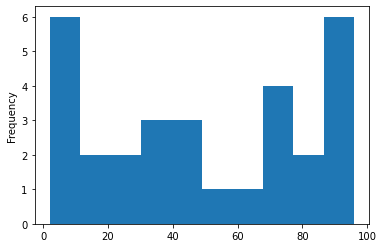

In [148]:
#%matplotlib inline
notas.plot.hist()

<AxesSubplot:ylabel='Frequency'>

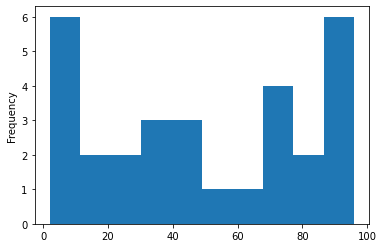

In [149]:
notas.plot.hist(101)

In [150]:
np.sort(notas)

array([ 2,  4,  5,  6,  6, 11, 19, 20, 22, 26, 31, 33, 35, 41, 43, 48, 49,
       64, 68, 70, 70, 71, 78, 85, 90, 91, 92, 94, 95, 96])

In [151]:
notas.nunique()

28

<AxesSubplot:>

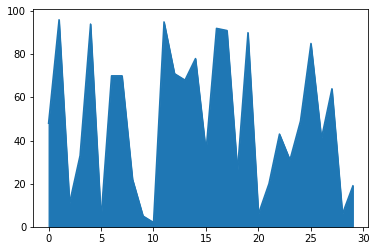

In [152]:
notas.plot.area()

<AxesSubplot:>

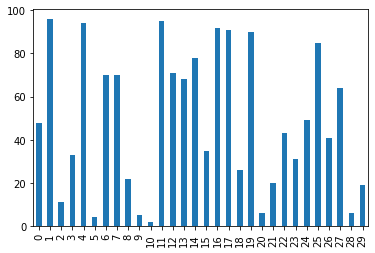

In [153]:
notas.plot.bar()

<AxesSubplot:>

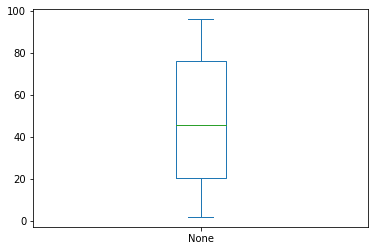

In [154]:
notas.plot.box()

In [155]:
print(notas.min(), notas.quantile(.25), notas.quantile(.5), notas.quantile(.75), notas.max())

2 20.5 45.5 76.25 96


<AxesSubplot:>

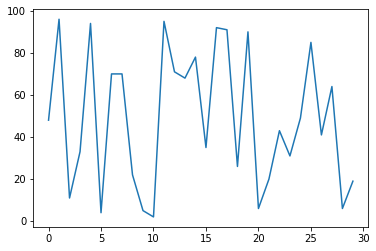

In [156]:
notas.plot.line()

<AxesSubplot:>

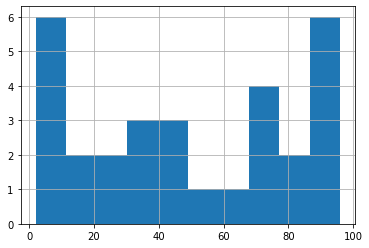

In [157]:
notas.hist()